### import Linbraries

In [689]:
import numpy as np 
import pandas as pd 


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from  imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os 
import re
import json
import pickle
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
## Feature Selection 


## evalution matrix 
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold


# ALgorithms 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
import xgboost



# warnings
import warnings
warnings.filterwarnings('ignore')

### Problem Statment : 

using following feature we predict Patient having heart dieseas or not
Target:
1.HeartDisease
Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

Independent Features:
2.BMI
Body Mass Index (BMI)

3.Smoking
Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

4.AlcoholDrinking
Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

5.Stroke
(Ever told) (you had) a stroke?

6.PhysicalHealth
Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0-30 days)

7.MentalHealth
Thinking about your mental health, for how many days during the past 30 days was your mental health not good? (0-30 days)

8.DiffWalking
Do you have serious difficulty walking or climbing stairs?

9.Sex
Are you male or female?

10.AgeCategory
Fourteen-level age category

11.Race
Imputed race/ethnicity value

12.Diabetic
(Ever told) (you had) diabetes?

13.PhysicalActivity
Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

14.GenHealth
Would you say that in general your health is...

15.SleepTime
On average, how many hours of sleep do you get in a 24-hour period?

16.Asthma
(Ever told) (you had) asthma?

17.KidneyDisease
Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

18.SkinCancer
(Ever told) (you had) skin cancer?

### Data Gathering 

In [690]:
file_path= os.path.join(os.getcwd(),r'csv_file\heart_2020_cleaned.csv')
file_path

'E:\\project1\\done_project\\heart_disease\\csv_file\\heart_2020_cleaned.csv'

In [691]:
df = pd.read_csv(file_path)
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [692]:
under_sample = RandomUnderSampler()


In [693]:
x = df.drop('HeartDisease',axis=1) 

In [694]:
y = df['HeartDisease']

In [695]:
X , Y = under_sample.fit_resample(x,y )

In [696]:
X.shape


(54746, 17)

## Train_Test_Split : 

In [697]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42,train_size=0.2,stratify=Y
                                                )

In [698]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10949 entries, 52319 to 39032
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               10949 non-null  float64
 1   Smoking           10949 non-null  object 
 2   AlcoholDrinking   10949 non-null  object 
 3   Stroke            10949 non-null  object 
 4   PhysicalHealth    10949 non-null  float64
 5   MentalHealth      10949 non-null  float64
 6   DiffWalking       10949 non-null  object 
 7   Sex               10949 non-null  object 
 8   AgeCategory       10949 non-null  object 
 9   Race              10949 non-null  object 
 10  Diabetic          10949 non-null  object 
 11  PhysicalActivity  10949 non-null  object 
 12  GenHealth         10949 non-null  object 
 13  SleepTime         10949 non-null  float64
 14  Asthma            10949 non-null  object 
 15  KidneyDisease     10949 non-null  object 
 16  SkinCancer        10949 non-null  ob

### EDA (Data Exploratory Analysis)

### 1. HeartDisease 

<AxesSubplot: xlabel='HeartDisease', ylabel='count'>

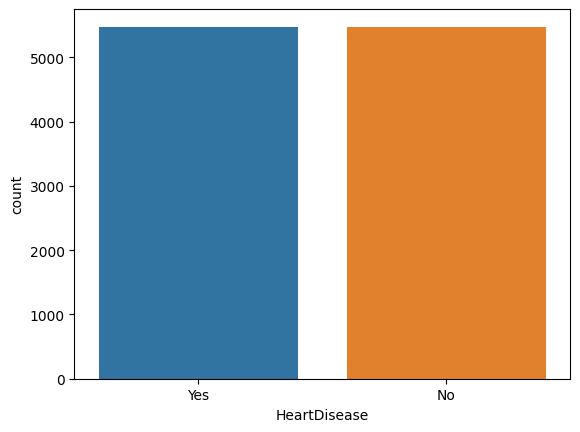

In [699]:
sns.countplot(x = y_train)

In [700]:
y_train.value_counts().to_dict()

{'Yes': 5475, 'No': 5474}

In [701]:
Heart_Disesease = {'No':0, 'Yes':1}

In [702]:
y_train.replace(Heart_Disesease,inplace=True)

In [703]:
5475/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.5000456662708923

### 2. BMI

In [704]:
x_train['BMI'] = np.log(x_train['BMI'])

<AxesSubplot: xlabel='BMI', ylabel='Density'>

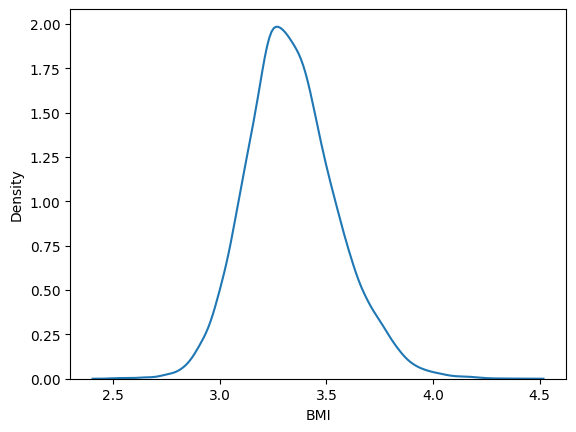

In [705]:
sns.kdeplot(x_train['BMI'])

### 3. Smoking

In [706]:
data = x_train['Smoking'].value_counts().to_dict()
Smoking = {'No': 0, 'Yes': 1}

<AxesSubplot: xlabel='Smoking', ylabel='count'>

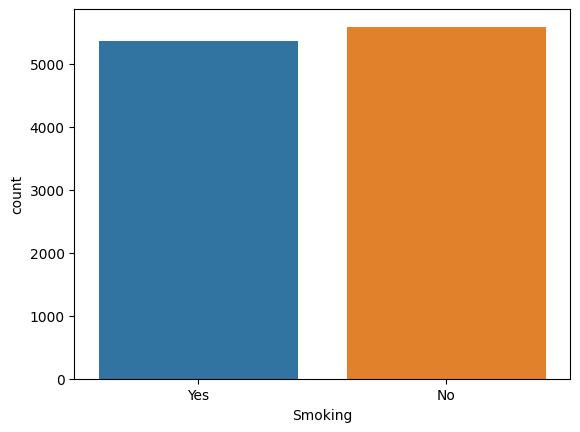

In [707]:
sns.countplot(x = x_train['Smoking'])

In [708]:
x_train.Smoking.value_counts()

No     5584
Yes    5365
Name: Smoking, dtype: int64

In [709]:
x_train['Smoking'].replace(Smoking,inplace=True)

### 4. AlcoholDrinking

<AxesSubplot: xlabel='AlcoholDrinking', ylabel='count'>

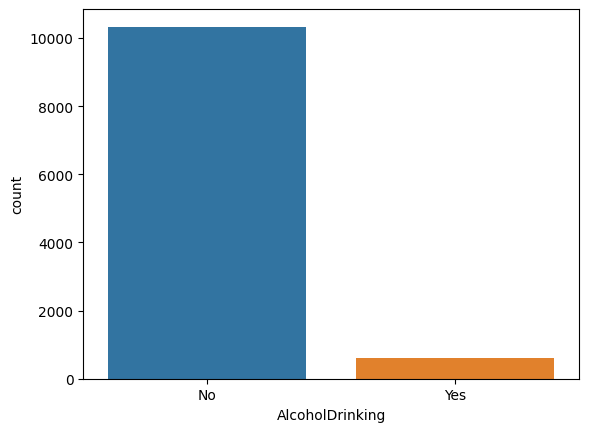

In [710]:
sns.countplot(x = x_train['AlcoholDrinking'])

In [711]:
# More than 90% people don't drink alcohol

In [712]:
x_train['AlcoholDrinking'].value_counts().to_dict()

{'No': 10332, 'Yes': 617}

In [713]:
AlcoholDrinking ={'No': 0, 'Yes': 1}

In [714]:
x_train['AlcoholDrinking'].replace(AlcoholDrinking,inplace=True)

### 5. Stroke

In [715]:
x_train['Stroke'].value_counts().to_dict()

{'No': 9890, 'Yes': 1059}

<AxesSubplot: xlabel='Stroke', ylabel='count'>

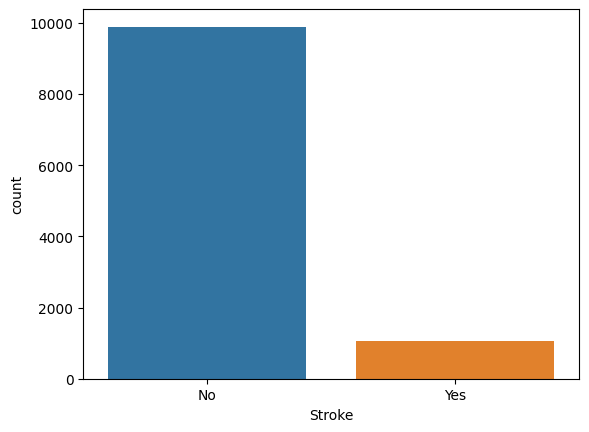

In [716]:
sns.countplot(x = x_train['Stroke'])

In [717]:
Stroke = {'No':0, 'Yes':1}

In [718]:
x_train['Stroke'].replace(Stroke,inplace=True)

In [719]:
# less than 5% pepele in their life suffer from brain strok 

### 6.PhysicalHealth

In [720]:
x_train['PhysicalHealth'].value_counts()

0.0     6911
30.0    1147
2.0      475
3.0      312
5.0      300
1.0      289
15.0     288
10.0     259
20.0     189
7.0      185
4.0      180
14.0      95
25.0      71
6.0       60
8.0       35
28.0      29
21.0      28
12.0      25
18.0      13
29.0      13
17.0       9
9.0        8
27.0       7
16.0       6
22.0       4
13.0       4
11.0       2
26.0       2
24.0       2
23.0       1
Name: PhysicalHealth, dtype: int64

<AxesSubplot: xlabel='HeartDisease', ylabel='PhysicalHealth'>

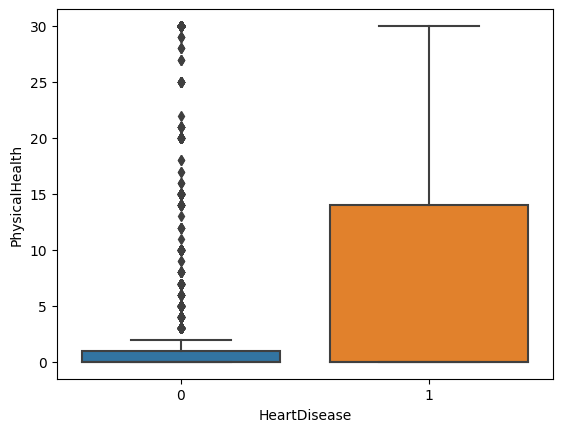

In [721]:
sns.boxplot(x=y_train , y = x_train['PhysicalHealth'])

<AxesSubplot: xlabel='PhysicalHealth', ylabel='Density'>

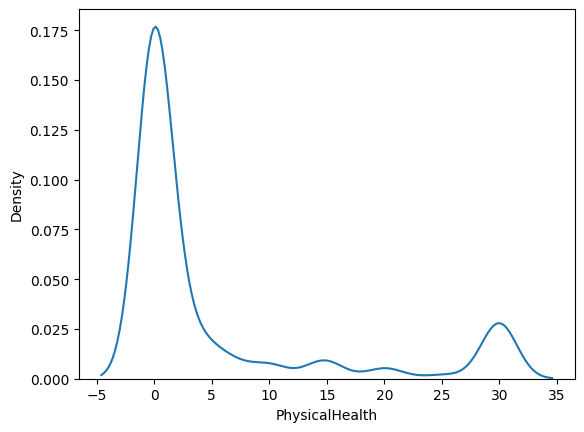

In [722]:
sns.kdeplot(x = x_train["PhysicalHealth"])

In [723]:
def boxcox(*args) -> np.array:
    return stats.boxcox(*args)[0]

### 7. MentalHealth

In [724]:
x_train['MentalHealth'].value_counts()

0.0     7179
30.0     771
2.0      467
5.0      444
15.0     334
10.0     326
3.0      312
1.0      279
20.0     205
4.0      152
7.0      145
14.0      67
25.0      62
6.0       58
8.0       30
28.0      27
12.0      23
21.0      15
29.0      14
18.0       7
13.0       6
16.0       6
9.0        5
17.0       3
23.0       3
11.0       3
27.0       2
22.0       2
26.0       2
Name: MentalHealth, dtype: int64

In [725]:
x_train['MentalHealth'].max()

30.0

In [726]:
x_train['MentalHealth'].min()

0.0

<AxesSubplot: xlabel='MentalHealth', ylabel='Density'>

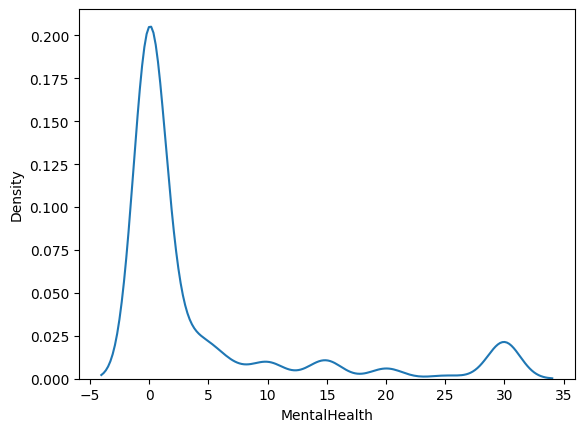

In [727]:
sns.kdeplot(x = x_train['MentalHealth'])

In [728]:
x_train['MentalHealth'].skew()

2.144341977127991

 >> mentalHealth is highly skewd

In [729]:
# df.loc[ df[“column_name”] == “some_value”, “column_name”] = “value”

In [730]:
index = np.where(x_train['MentalHealth']==0)[0]

In [731]:
# x_train.loc[x_train['MentalHealth']==0,'MentalHealth']=np.nan

### 8.DiffWalking

In [732]:
x_train['DiffWalking'].value_counts().to_dict()

{'No': 8355, 'Yes': 2594}

In [733]:
DiffWalking = {'No': 0, 'Yes':1}

In [734]:
x_train['DiffWalking'].replace(DiffWalking,inplace=True)

<AxesSubplot: xlabel='DiffWalking', ylabel='count'>

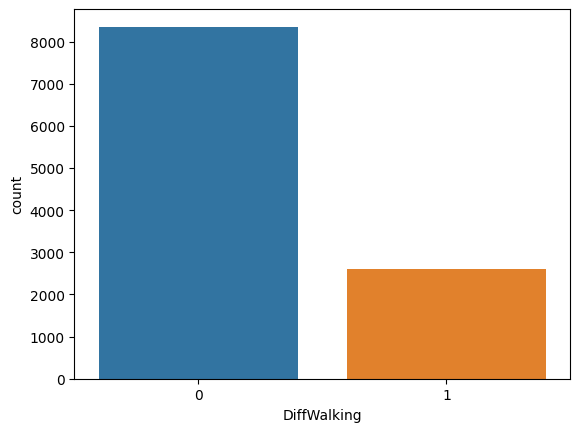

In [735]:
sns.countplot(x = x_train['DiffWalking'])

In [736]:
x_train['DiffWalking'].replace(data,inplace=True)

### 9. Sex 

In [737]:

x_train['Sex'].value_counts().to_dict()

{'Male': 5808, 'Female': 5141}

<AxesSubplot: xlabel='Sex', ylabel='count'>

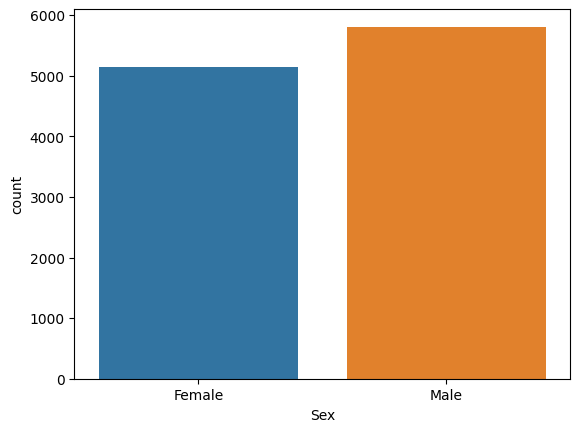

In [738]:
sns.countplot(x=x_train['Sex'])

In [739]:
Sex = {'Female': 0, 'Male': 1}

In [740]:
x_train['Sex'].replace(Sex,inplace=True)

### 10.AgeCategory

In [741]:
x_train['AgeCategory'].value_counts()

80 or older    1497
70-74          1421
65-69          1391
60-64          1264
75-79          1146
55-59           932
50-54           753
45-49           505
40-44           489
18-24           437
35-39           427
30-34           379
25-29           308
Name: AgeCategory, dtype: int64

<AxesSubplot: xlabel='AgeCategory', ylabel='count'>

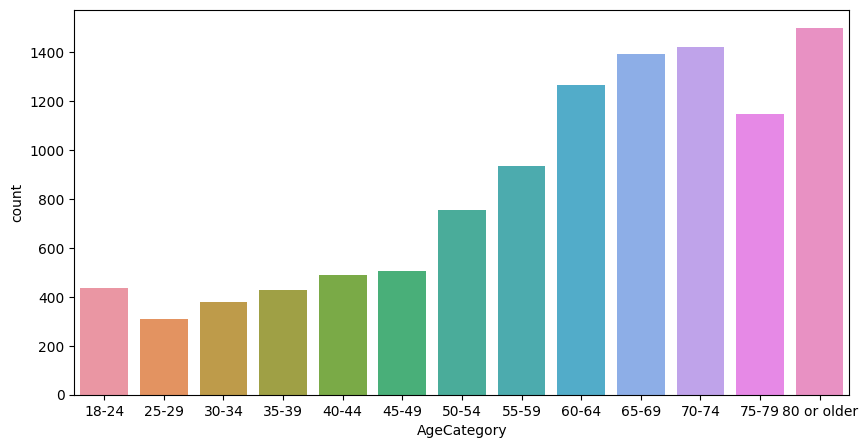

In [742]:
plt.figure(figsize= (10,5))
sns.countplot(x = x_train.AgeCategory.sort_values())


In [743]:
x_train['AgeCategory'].dtypes

dtype('O')

In [744]:
import re
def extract_age(age_data):

    if len(age_data)==5:
        age = re.findall('\d{2}',age_data)
        age_mean = (int(age[0]) + int(age[1]))/len(age)
        return age_mean
    else:
        age = re.findall('\d{2}',age_data)
        age_mean =int(age[0])
        return age_mean
    
# age_data = '80 or older'        
        
# extract_age(age_data)        

In [745]:
x_train['AgeCategory']=x_train['AgeCategory'].apply(extract_age)

In [746]:
x_train['AgeCategory']

52319    57.0
10726    21.0
25622    62.0
17763    52.0
11752    52.0
         ... 
14094    42.0
14653    72.0
39141    80.0
35471    62.0
39032    72.0
Name: AgeCategory, Length: 10949, dtype: float64

<AxesSubplot: xlabel='AgeCategory', ylabel='Density'>

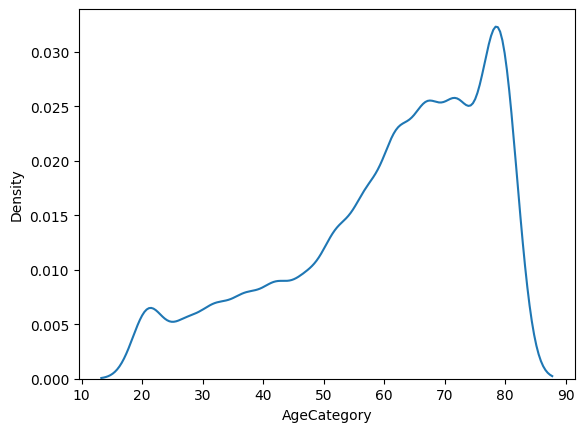

In [747]:
sns.kdeplot(x= x_train['AgeCategory'])

>> AgeCategory is Negative skwed skewd 

### 11. Race  

In [748]:
x_train['Race'].value_counts().to_dict()

{'White': 8668,
 'Hispanic': 816,
 'Black': 780,
 'Other': 315,
 'American Indian/Alaskan Native': 193,
 'Asian': 177}

<AxesSubplot: xlabel='Race', ylabel='count'>

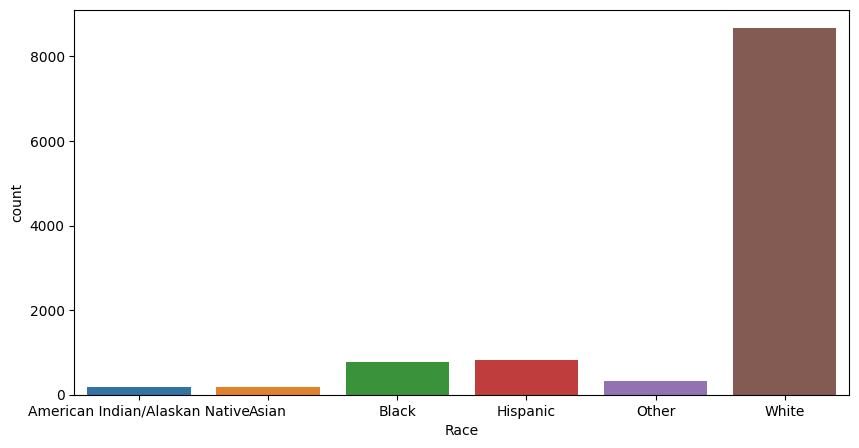

In [749]:
plt.figure(figsize = (10,5))
sns.countplot(x = x_train.Race.sort_values() )

In [750]:
Race = {'White': 49202,
 'Hispanic': 5377,
 'Black': 4535,
 'Other': 2197,
 'Asian': 1643,
 'American Indian/Alaskan Native': 1005}

In [751]:
# hue = OneHotEncoder()
# hue.fit(x_train[['Race','Diabetic']])
# x_train = pd.get_dummies(x_train['Race'])

### 11. Diabetic

In [752]:
x_train['Diabetic'].value_counts().to_dict()

{'No': 8222,
 'Yes': 2397,
 'No, borderline diabetes': 269,
 'Yes (during pregnancy)': 61}

<AxesSubplot: xlabel='Diabetic', ylabel='count'>

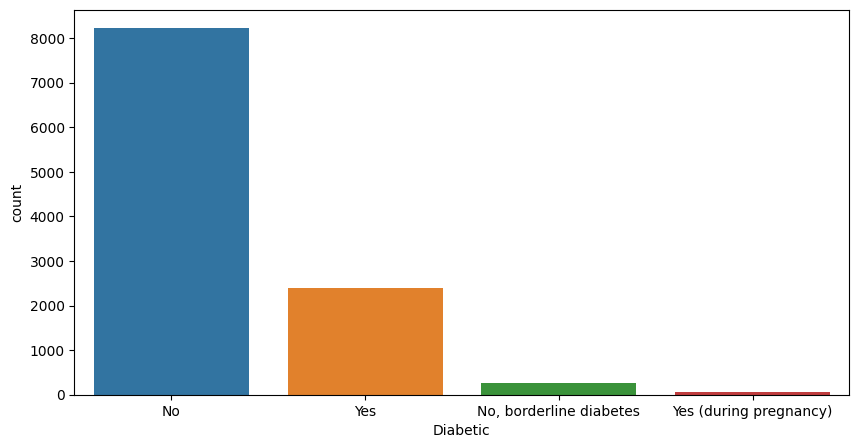

In [753]:
plt.figure(figsize = (10,5))
sns.countplot(x = x_train['Diabetic'])

### 12.PhysicalActivity

In [754]:
x_train['PhysicalActivity'].value_counts().to_dict()

{'Yes': 7819, 'No': 3130}

<AxesSubplot: xlabel='PhysicalActivity', ylabel='count'>

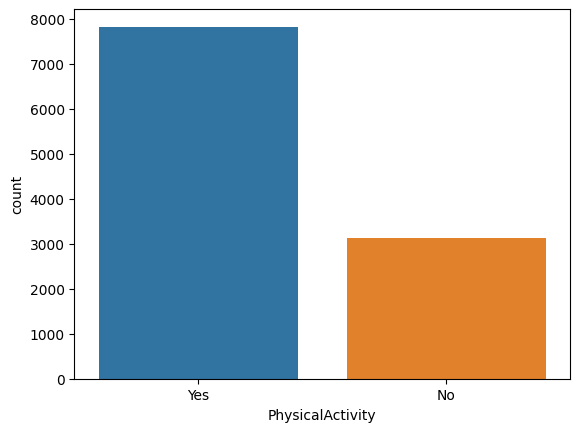

In [755]:
sns.countplot(x = x_train.PhysicalActivity)

In [756]:
PhysicalActivity = {'Yes':0, 'No':1}

x_train["PhysicalActivity"].replace({'Yes':0, 'No':1},inplace=True)

### 13. GenHealth

In [757]:
x_train['GenHealth'].value_counts().to_dict()

{'Good': 3506, 'Very good': 3144, 'Fair': 1894, 'Excellent': 1522, 'Poor': 883}

In [758]:
GenHealth= {'Very good': 2,
 'Good': 3,
 'Excellent': 1,
 'Fair': 4,
 'Poor': 5}

<AxesSubplot: xlabel='GenHealth', ylabel='count'>

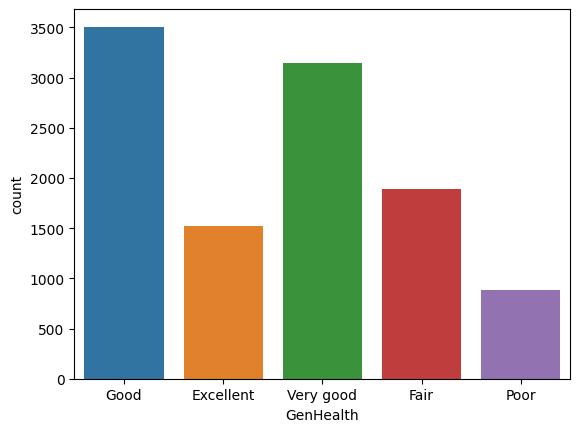

In [759]:
sns.countplot(x = x_train.GenHealth)

In [760]:
x_train['GenHealth'].replace(GenHealth,inplace=True)

### 14. SleepTime 

In [761]:
x_train['SleepTime'].value_counts()

8.0     3331
7.0     2950
6.0     2254
5.0      741
9.0      618
4.0      358
10.0     349
12.0     109
3.0      101
2.0       37
1.0       26
11.0      17
16.0      15
14.0      15
18.0       8
15.0       7
20.0       5
13.0       4
24.0       3
22.0       1
Name: SleepTime, dtype: int64

In [762]:
(x_train['SleepTime']>=15).sum()

39

In [763]:
x_train.loc[ (x_train["SleepTime"]>=15) & (x_train["SleepTime"]<=3) , "SleepTime"] = np.nan

In [764]:
med = x_train['SleepTime'].median()
x_train['SleepTime'].fillna(med)

52319     7.0
10726     7.0
25622     7.0
17763     8.0
11752     8.0
         ... 
14094     5.0
14653     7.0
39141    12.0
35471     8.0
39032     7.0
Name: SleepTime, Length: 10949, dtype: float64

### 15. Asthma 

In [765]:
x_train['Asthma'].value_counts()

No     9309
Yes    1640
Name: Asthma, dtype: int64

<AxesSubplot: xlabel='Asthma', ylabel='count'>

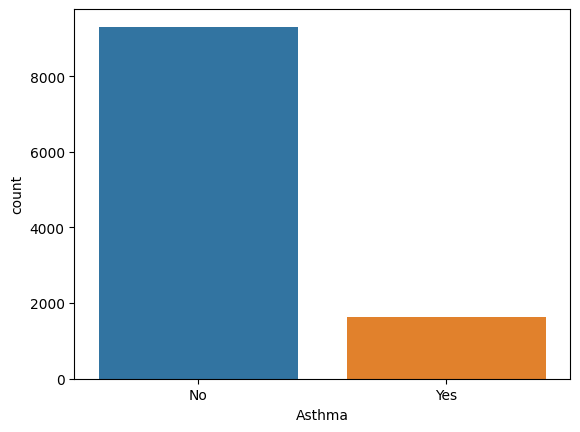

In [766]:
sns.countplot(x = x_train.Asthma)

In [767]:
Asthma= {'No': 0, 'Yes': 1}
x_train['Asthma'].replace(Asthma, inplace=True)

### 16. KidneyDisease      

In [768]:
x_train['KidneyDisease'].value_counts()

No     10109
Yes      840
Name: KidneyDisease, dtype: int64

<AxesSubplot: xlabel='KidneyDisease', ylabel='count'>

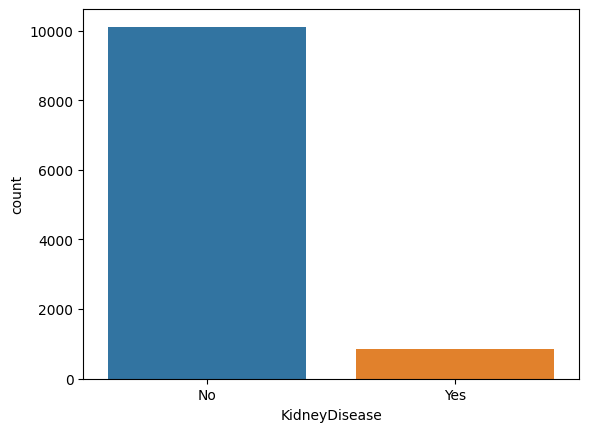

In [769]:
sns.countplot(x = x_train.KidneyDisease)

In [770]:
KidneyDisease= {'No': 0, 'Yes': 1}
x_train['KidneyDisease'].replace(KidneyDisease, inplace=True)

### 17. SkinCancer

In [771]:
x_train['SkinCancer'].value_counts().to_dict()

{'No': 9429, 'Yes': 1520}

<AxesSubplot: xlabel='SkinCancer', ylabel='count'>

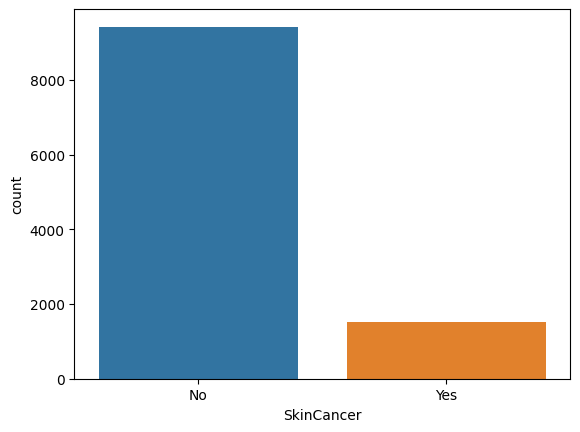

In [772]:
sns.countplot(x = x_train.SkinCancer)

In [773]:
SkinCancer= {'No': 0, 'Yes': 1}

In [774]:
x_train['SkinCancer'].replace(SkinCancer,inplace=True)

## Univariate Analysis

### Conclusion : 

Catgorical Data: 
1.Target column is highly imbalanced 90% = No , 8% = Yes
2.Smoking almost the 42% people smoker 
3.More than 90% people don't drink alcohol
4.less than 5% pepele in their life suffer from brain strok 
5.Diffwalking more 5% people do.
6.Male and Female catagory are amlost equal
7.Almost the 65% people Physicaly active


Ordinal Data 
1.In AgeCatgory most of the people belongs to 50-80 or older catgory
2.In Race almost more than 80% people white
3.Diabitic moret than 75%.
4.GenHealt most of the people with very and good health
5.

Numeric Data : 
1.MentalHealth highly positive skwed
2.PhysicalHealt higly positive skewd
3.Most of the people sleeping duration 5-9


## One Hot Encoder :

In [775]:
# hue = OneHotEncoder()
# hue.fit(x_train[['Race','Diabetic']])


In [776]:
# hue.categories_

In [777]:
# coln_trans=make_column_transformer((OneHotEncoder(categories=hue.categories_),['Race','Diabetic']),remainder="passthrough")

In [778]:
# coln_trans

In [779]:
one_hot = pd.get_dummies(x_train[['Race','Diabetic']])

In [780]:
x_train = x_train.drop(['Race','Diabetic'],axis = 1)

In [781]:
x_train = pd.concat([x_train , one_hot],axis = 1)

# Testing : 

In [782]:
y_test.replace(Heart_Disesease,inplace=True)
x_test['BMI'] = x_test['BMI'].apply(lambda x : np.log(x))
x_test['Smoking'].replace(Smoking,inplace=True)
x_test['AlcoholDrinking'].replace(AlcoholDrinking,inplace=True)
x_test['Stroke'].replace(Stroke,inplace=True)
x_test['DiffWalking'].replace(DiffWalking,inplace=True)
x_test['Sex'].replace(Sex,inplace=True)
x_test["PhysicalActivity"].replace({'Yes':0, 'No':1},inplace=True)
x_test["PhysicalActivity"].replace({'Yes':0, 'No':1},inplace=True)
x_test['GenHealth'].replace(GenHealth,inplace=True)
x_test['Asthma'].replace(Asthma, inplace=True)
x_test['KidneyDisease'].replace(KidneyDisease, inplace=True)
x_test['SkinCancer'].replace(SkinCancer,inplace=True)
x_test['AgeCategory']=x_test['AgeCategory'].apply(extract_age)

In [783]:
one_hot = pd.get_dummies(x_test[['Race','Diabetic']])

In [784]:
x_test = x_test.drop(['Race','Diabetic'],axis = 1)

In [785]:
x_test=pd.concat([x_test , one_hot],axis = 1)

In [786]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43797 entries, 14559 to 54048
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   BMI                                  43797 non-null  float64
 1   Smoking                              43797 non-null  int64  
 2   AlcoholDrinking                      43797 non-null  int64  
 3   Stroke                               43797 non-null  int64  
 4   PhysicalHealth                       43797 non-null  float64
 5   MentalHealth                         43797 non-null  float64
 6   DiffWalking                          43797 non-null  int64  
 7   Sex                                  43797 non-null  int64  
 8   AgeCategory                          43797 non-null  float64
 9   PhysicalActivity                     43797 non-null  int64  
 10  GenHealth                            43797 non-null  int64  
 11  SleepTime               

#### Missing Values : 

In [787]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10949 entries, 52319 to 39032
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   BMI                                  10949 non-null  float64
 1   Smoking                              10949 non-null  int64  
 2   AlcoholDrinking                      10949 non-null  int64  
 3   Stroke                               10949 non-null  int64  
 4   PhysicalHealth                       10949 non-null  float64
 5   MentalHealth                         10949 non-null  float64
 6   DiffWalking                          10949 non-null  int64  
 7   Sex                                  10949 non-null  int64  
 8   AgeCategory                          10949 non-null  float64
 9   PhysicalActivity                     10949 non-null  int64  
 10  GenHealth                            10949 non-null  int64  
 11  SleepTime               

# Algorithms ===================================================

## 1. Logistic Regression 

In [788]:
log_model = LogisticRegression()

In [789]:
log_model.fit(x_train, y_train)

LogisticRegression()

In [790]:
# linear_reg_pip.fit(x_train,y_train)

### Evalution Matrix : 

In [791]:
############### Training ##############################

y_pred_train =log_model.predict(x_train)

print("Confusion Matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Classification Table \n", classification_report(y_train, y_pred_train))

y_test_pred = log_model.predict(x_test)
print("Confusion Matrix : \n",confusion_matrix(y_test, y_test_pred))
print("Classification Table \n", classification_report(y_test, y_test_pred))


Confusion Matrix : 
 [[4084 1390]
 [1316 4159]]
Classification Table 
               precision    recall  f1-score   support

           0       0.76      0.75      0.75      5474
           1       0.75      0.76      0.75      5475

    accuracy                           0.75     10949
   macro avg       0.75      0.75      0.75     10949
weighted avg       0.75      0.75      0.75     10949

Confusion Matrix : 
 [[16592  5307]
 [ 5253 16645]]
Classification Table 
               precision    recall  f1-score   support

           0       0.76      0.76      0.76     21899
           1       0.76      0.76      0.76     21898

    accuracy                           0.76     43797
   macro avg       0.76      0.76      0.76     43797
weighted avg       0.76      0.76      0.76     43797



### HyperParameter tunning 

In [792]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)

In [793]:
model  =grid_result.best_estimator_
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [794]:
y_pred_train =model.predict(x_train)

print("Confusion Matrix : \n",confusion_matrix(y_train, y_pred_train))
print("Classification Table \n", classification_report(y_train, y_pred_train))

y_test_pred = model.predict(x_test)
print("Confusion Matrix : \n",confusion_matrix(y_test, y_test_pred))
print("Classification Table \n", classification_report(y_test, y_test_pred))


Confusion Matrix : 
 [[4095 1379]
 [1219 4256]]
Classification Table 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      5474
           1       0.76      0.78      0.77      5475

    accuracy                           0.76     10949
   macro avg       0.76      0.76      0.76     10949
weighted avg       0.76      0.76      0.76     10949

Confusion Matrix : 
 [[16434  5465]
 [ 4907 16991]]
Classification Table 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76     21899
           1       0.76      0.78      0.77     21898

    accuracy                           0.76     43797
   macro avg       0.76      0.76      0.76     43797
weighted avg       0.76      0.76      0.76     43797



# Model file

In [818]:
with  open('model.pkl', 'wb') as f:
    pickle.dump(model,f)

# data file 

In [842]:
project_data = {'Smoking': {'No': 0, 'Yes': 1},
'AlcoholDrinking' :{'No': 0, 'Yes': 1},
'Stroke' :{'No':0, 'Yes':1},
'DiffWalking': {'No': 0, 'Yes':1},
'Sex' : {'Female': 0, 'Male': 1},
'PhysicalActivity' : {'Yes':0, 'No':1},
'GenHealth': {'Very good': 2,
 'Good': 3,
 'Excellent': 1,
 'Fair': 4,
 'Poor': 5},
'Asthma': {'No': 0, 'Yes': 1},
'KidneyDisease': {'No': 0, 'Yes': 1},
'SkinCancer':{'No': 0, 'Yes': 1},
'Stroke':{'No':0, 'Yes':1},
'data' : ['BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'PhysicalHealth',
 'MentalHealth',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'PhysicalActivity',
 'GenHealth',
 'SleepTime',
 'Asthma',
 'KidneyDisease',
 'SkinCancer',
 'Race_American Indian/Alaskan Native',
 'Race_Asian',
 'Race_Black',
 'Race_Hispanic',
 'Race_Other',
 'Race_White',
 'Diabetic_No',
 'Diabetic_No, borderline diabetes',
 'Diabetic_Yes',
 'Diabetic_Yes (during pregnancy)']}



In [862]:
with open('pro_data.json', 'w') as f:
    json.dump(project_data, f)
    

In [864]:
BMI =16.6
Smoking ='Yes'
AlcoholDrinking ='No'
Stroke = 'No' 
PhysicalHealth = 3
MentalHealth = 30
DiffWalking = 'No'
Sex ='Female'
AgeCategory =56
Race ='White'
Diabetic ='Yes'
PhysicalActivity ='Yes'
GenHealth  ='Very good'
SleepTime =5
Asthma ='No'
KidneyDisease ='Yes'
SkinCancer = 'No'


features = np.zeros( len(project_data['data']))
x1 = "Race_"+Race
index1 = project_data['data'].index(x1)
x2 = "Diabetic_"+ Diabetic
index2 = project_data['data'].index(x2)


features[0]=BMI
features[1]=project_data['Smoking'][Smoking]  
features[2]=project_data['AlcoholDrinking'][AlcoholDrinking] 
features[3]=project_data['Stroke'][Stroke] 
features[4]=PhysicalHealth 
features[5]= MentalHealth
features[6]= project_data['DiffWalking'][DiffWalking] 
features[7]= project_data['Sex'][Sex]
features[8]= AgeCategory 

features[9]= project_data['PhysicalActivity'][PhysicalActivity] 
features[10]= project_data['GenHealth'][GenHealth] 
features[11]= SleepTime 
features[12]= project_data['Asthma'][Asthma]
features[13]= project_data['KidneyDisease'][KidneyDisease]
features[14]= project_data['SkinCancer'][SkinCancer]
features[index1]= 1 
features[index2]= 1
print([features])

model.predict([features])[0]

[array([16.6,  1. ,  0. ,  0. ,  3. , 30. ,  0. ,  0. , 56. ,  0. ,  2. ,
        5. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  1. ,  0. ,
        0. ,  1. ,  0. ])]


1

In [863]:
import gzip, pickle

with  open('model.pklz', 'wb') as f:
    pickle.dump(model,f)